<a href="https://colab.research.google.com/github/riya-dharshu04/Semmelweis-and-the-Discovery-of-Handwashing/blob/main/priya(regression_modelling).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder


In [3]:
from sklearn.preprocessing import LabelEncoder

In [12]:
df=pd.read_csv('/Bondora_preprocessed.csv', encoding='latin-1', low_memory=False,error_bad_lines=False)


Skipping line 9099: expected 43 fields, saw 45
Skipping line 40716: expected 43 fields, saw 45



In [13]:
df.columns

Index(['BidsPortfolioManager', 'BidsApi', 'BidsManual', 'VerificationType',
       'LanguageCode', 'Age', 'Gender', 'Country', 'AppliedAmount', 'Amount',
       'Interest', 'LoanDuration', 'MonthlyPayment', 'County', 'City',
       'UseOfLoan', 'Education', 'MaritalStatus', 'EmploymentStatus',
       'EmploymentDurationCurrentEmployer', 'OccupationArea',
       'HomeOwnershipType', 'IncomeTotal', 'ExistingLiabilities',
       'LiabilitiesTotal', 'RefinanceLiabilities', 'DebtToIncome', 'FreeCash',
       'MonthlyPaymentDay', 'Rating', 'Status', 'Restructured',
       'CreditScoreEsMicroL', 'PrincipalPaymentsMade',
       'InterestAndPenaltyPaymentsMade', 'PrincipalBalance',
       'InterestAndPenaltyBalance', 'NoOfPreviousLoansBeforeLoan',
       'AmountOfPreviousLoansBeforeLoan', 'PreviousRepaymentsBeforeLoan',
       'PreviousEarlyRepaymentsCountBeforeLoan', 'Default',
       'New Credit Customer'],
      dtype='object')

In [14]:
df.describe()

,BidsPortfolioManager,BidsApi,BidsManual,VerificationType,Age,Gender,AppliedAmount,Amount,Interest,LoanDuration,...,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,Default,New Credit Customer
count,134458.000000,134458.000000,134458.000000,134458.000000,134458.000000,134458.000000,134458.000000,134458.000000,134458.000000,134458.000000,...,134458.000000,134458.000000,134458.000000,134458.000000,134458.000000,134458.000000,134458.000000,134458.000000,134458.000000,134458.000000
mean,966.043739,29.127036,559.220649,2.817058,40.821751,0.441870,2728.038919,2543.888989,35.894575,46.159009,...,760.621433,488.106498,1770.153570,701.532803,1.488048,2869.816315,928.684744,0.069940,0.275952,0.578285
std,1355.518018,150.197298,749.936418,1.407963,12.348748,0.636087,2374.593673,2170.179445,26.294313,15.198731,...,1370.635589,827.303763,2030.697524,2514.315560,2.396429,4507.823785,1683.384860,0.359552,0.446995,0.493835
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,31.955800,6.390000,3.000000,1.000000,...,0.000000,0.000000,-34.200000,-2.660000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,155.000000,0.000000,96.000000,1.000000,31.000000,0.000000,800.000000,744.000000,20.000000,36.000000,...,50.812500,44.892500,217.230000,0.000000,0.000000,0.000000,55.177500,0.000000,0.000000,0.000000
50%,465.000000,0.000000,317.000000,4.000000,40.000000,0.000000,2125.000000,2125.000000,30.930000,48.000000,...,207.810000,181.035000,1063.000000,0.000000,1.000000,402.623450,712.360000,0.000000,0.000000,1.000000
75%,1216.000000,5.000000,729.000000,4.000000,50.000000,1.000000,4145.000000,3600.000000,40.400000,60.000000,...,763.675000,568.220000,2637.855000,202.977500,2.000000,4250.000000,928.395548,0.000000,1.000000,1.000000
max,10625.000000,7570.000000,10630.000000,4.000000,77.000000,2.000000,10632.000000,10632.000000,264.310000,60.000000,...,10632.000000,16873.000000,10632.000000,64494.770000,25.000000,53762.000000,34077.420000,11.000000,1.000000,1.000000


In [15]:
df[['Amount','Interest','LoanDuration']].describe()

,Amount,Interest,LoanDuration
count,134458.000000,134458.000000,134458.000000
mean,2543.888989,35.894575,46.159009
std,2170.179445,26.294313,15.198731
min,6.390000,3.000000,1.000000
25%,744.000000,20.000000,36.000000
50%,2125.000000,30.930000,48.000000
75%,3600.000000,40.400000,60.000000
max,10632.000000,264.310000,60.000000


**CALCULATE** **ROI**

ROI = ((Net Profit / Cost of Investment) * 100)

In [16]:
def calculate_roi(net_profit, cost_of_investment):
    roi = (net_profit / cost_of_investment) * 100
    return roi


In [18]:
# Example usage
net_profit = 5000
cost_of_investment = 10000

roi = calculate_roi(net_profit, cost_of_investment)
print("ROI: {:.2f}%".format(roi))

ROI: 50.00%


**Calculate** **EMI**

In [20]:
import math

In [21]:
def calculate_emi(principal, interest_rate, tenure):
    # Convert interest rate from percentage to decimal
    interest_rate = interest_rate / 100

    # Convert tenure from years to months
    tenure = tenure * 12

    # Calculate monthly interest rate
    monthly_interest_rate = interest_rate / 12

    # Calculate EMI
    emi = (principal * monthly_interest_rate * math.pow(1 + monthly_interest_rate, tenure)) / (math.pow(1 + monthly_interest_rate, tenure) - 1)

    return emi



In [22]:
principal = 1000000  # Loan amount
interest_rate = 12  # Annual interest rate
tenure = 5  # Loan tenure in years

emi = calculate_emi(principal, interest_rate, tenure)
print("EMI: {:.2f}".format(emi))

EMI: 22244.45


In [27]:
df.head(10)

,BidsPortfolioManager,BidsApi,BidsManual,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,Amount,...,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,Default,New Credit Customer
0,0,0,115.0410,2.0,1,61,1.0,EE,319.5582,115.0408,...,115.0408,20.4222,0.00,0.00,1,83.0852,0.0000,0,0,1
1,0,0,140.6057,2.0,1,48,1.0,EE,191.7349,140.6057,...,140.6057,2.0227,0.00,0.00,2,255.6467,258.6256,0,0,0
2,0,0,319.5580,2.0,1,58,1.0,EE,319.5582,319.5409,...,203.1909,59.7626,116.35,414.07,0,0.0000,0.0000,0,1,1
3,0,0,57.5205,2.0,1,23,1.0,EE,127.8233,57.5205,...,57.5205,18.7323,0.00,0.00,1,134.2144,0.0000,0,0,1
4,0,0,319.5582,2.0,1,25,1.0,EE,319.5582,319.5436,...,319.5436,220.4200,0.00,0.00,1,146.9966,0.0000,0,0,1
5,0,0,300.3845,2.0,1,22,0.0,EE,300.3847,300.4314,...,300.4314,124.2294,0.00,0.00,3,338.7324,0.0000,0,0,1
6,0,0,191.7350,2.0,1,47,1.0,EE,191.7349,191.7445,...,191.7445,172.9222,0.00,0.00,1,223.6709,0.0000,0,0,1
7,0,0,31.9558,2.0,1,23,1.0,EE,191.7349,31.9518,...,31.9518,11.3105,0.00,0.00,3,428.2235,0.0000,0,0,1
8,0,0,31.9559,2.0,1,23,1.0,EE,178.9526,31.9498,...,31.9498,16.4482,0.00,0.00,4,460.1753,0.0000,0,0,1
9,0,0,319.5581,2.0,1,38,1.0,EE,319.5582,319.5583,...,319.5583,45.4153,0.00,0.00,0,0.0000,0.0000,0,0,1


In [33]:
pd.set_option('display.max_columns', 500)
sns.set(style="darkgrid")

In [28]:
def calculate_emi_and_roi(dataframe, amount_column, interest_column, duration_column, emi_column, roi_column):
    # Convert interest rate from percentage to decimal
    dataframe[interest_column] = dataframe[interest_column] / 100

    # Calculate EMI
    dataframe[emi_column] = (dataframe[amount_column] * dataframe[interest_column] * ((1 + dataframe[interest_column]) ** dataframe[duration_column])) / (((1 + dataframe[interest_column]) ** dataframe[duration_column]) - 1)

    # Calculate ROI
    dataframe[roi_column] = (dataframe[emi_column] * dataframe[duration_column] - dataframe[amount_column]) / dataframe[amount_column] * 100

In [36]:
amount_col = 'Amount'
interest_col = 'Interest'
duration_col = 'LoanDuration'
emi_col = 'EMI'
roi_col = 'ROI'
# Call the function to calculate EMI and ROI
calculate_emi_and_roi(df, amount_col, interest_col, duration_col, emi_col, roi_col)



In [37]:
df[['EMI','ROI','LoanDuration','Amount','Interest']].head()

,EMI,ROI,LoanDuration,Amount,Interest
0,36.060007,276.144884,12,115.0408,0.30
1,175.757125,25.000000,1,140.6057,0.25
2,80.816981,405.831844,20,319.5409,0.25
3,25.982891,577.572978,15,57.5205,0.45
4,100.162242,276.144884,12,319.5436,0.30


In [38]:
df[['EMI','ROI']].head()

,EMI,ROI
0,36.060007,276.144884
1,175.757125,25.000000
2,80.816981,405.831844
3,25.982891,577.572978
4,100.162242,276.144884


In [40]:
X = df.drop(['Amount', 'ROI', 'EMI'], axis=1)
y = df[['Amount']]

In [42]:
label_encoder = LabelEncoder()
X[X.columns] = X[X.columns].astype(str)

for column in X.columns:
    X[column] = label_encoder.fit_transform(X[column])

X = X.astype(int)

Linear Regression

In [43]:
from sklearn.linear_model import LinearRegression

# Assuming X and y are your independent and dependent variables, respectively
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

Lasso Regression

In [44]:
from sklearn.linear_model import Lasso

# Assuming X and y are your independent and dependent variables, respectively
model = Lasso(alpha=0.5)  # You can change the alpha (regularization parameter) as needed
model.fit(X, y)
y_pred = model.predict(X)

Time Series Regression

In [45]:
import statsmodels.api as sm

# Assuming y is your dependent variable and X is a DataFrame or array of independent variables
model = sm.OLS(y, X)
model_fit = model.fit()
y_pred = model_fit.predict(X)

Ridge Regression

In [46]:
from sklearn.linear_model import Ridge

# Assuming X and y are your independent and dependent variables, respectively
model = Ridge(alpha=0.5)  # You can change the alpha (regularization parameter) as needed
model.fit(X, y)
y_pred = model.predict(X)



Mean Squared Error (MSE): Measures the average squared difference between the predicted and actual values. It gives a higher weight to larger errors.

Root Mean Squared Error (RMSE): The square root of MSE, it provides a measure of the average magnitude of the errors.

Mean Absolute Error (MAE): Measures the average absolute difference between the predicted and actual values. It gives equal weight to all errors.

R-squared (R²): Represents the proportion of the variance in the dependent variable that is predictable from the independent variables.







In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Ridge regression model
model = Ridge(alpha=1.0)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

In [49]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 3792659.125324335
Root Mean Squared Error (RMSE): 1947.4750641084818
Mean Absolute Error (MAE): 1401.2920915951188
R-squared (R²): 0.20156758292959354


In [50]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [52]:
#Create a Lasso regression model
model = Lasso(alpha=1.0)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

In [53]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 3792670.78014023
Root Mean Squared Error (RMSE): 1947.4780563950471
Mean Absolute Error (MAE): 1401.299271331778
R-squared (R²): 0.20156512935216453


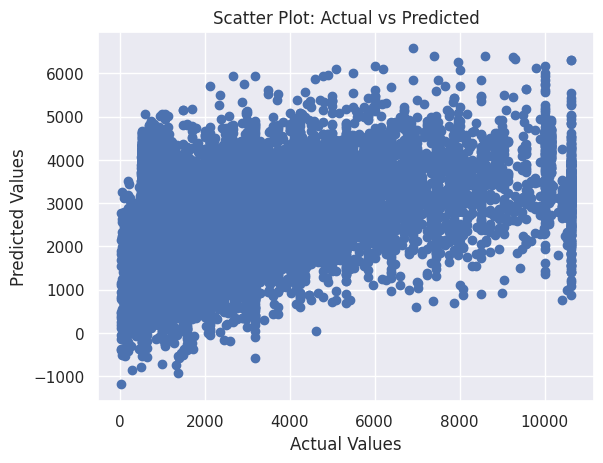

In [54]:
# Create scatter plot
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Scatter Plot: Actual vs Predicted")
plt.show()